# Session 2: Using Updated Tutoring Prompt

## Set up LLM through API

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import InMemorySaver

from IPython.display import Image, display

from dotenv import load_dotenv
_ = load_dotenv()

In [2]:
llm = init_chat_model("openai:gpt-4o-mini")

In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [5]:
memory = InMemorySaver()
graph = graph_builder.compile(checkpointer=memory)

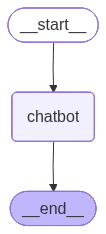

In [6]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", 
                                             "content": user_input}]},
                             config):
        for value in event.values():
            print("\nAssistant:", value["messages"][-1].content)


tutor_prompt = open('mollick_tutor_prompt.txt').read()
graph.update_state(config, 
    {"messages": tutor_prompt }
)
stream_graph_updates('Who are you?')

while True:
    try:
        user_input = input("\nUser: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "Who are you?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break


Assistant: Hi there! I'm your AI tutor, and I'm here to help you understand a topic of your choice better. I’m excited to work with you and support your learning journey! What would you like to learn about and why?



User:  I am a beginner wanting to learn how to play tennis. I want to learn basic shots and anything else I need to learn as someone starting out!



Assistant: That sounds like a fantastic goal! Tennis is a great sport that combines physical activity with strategy. To tailor my guidance to you, can you tell me what your learning level is? Are you a high school student, college student, or a professional?



User:  I am a college student



Assistant: Got it! Thanks for sharing that. Now, let's dive a bit deeper: what do you already know about tennis? Have you ever played or watched a match, or do you have any basic understanding of the rules or techniques?



User:  Yes! Great question. My dad has played for a really long time, so I always watch US/French/etc Opens with him



Assistant: That's awesome! Having that background will definitely help you as you start learning. Since you’ve seen matches, you may have an idea of the different shots players use during a game. 

To get us started on your tennis journey, let's focus on some of the basic shots. These typically include:

1. **Forehand** - Hitting the ball with the front of your dominant hand facing the net.
2. **Backhand** - Hitting the ball with the back of your dominant hand facing the net.
3. **Serve** - The shot that starts each point.
4. **Volley** - Hitting the ball before it bounces.

Which of these shots would you like to explore first, or is there something specific you’re curious about?



User:  I think I would like to learn the Forehand so I can start playing with my friends, I do not necessarily have to know how to serve and play an official match,



Assistant: Great choice! The forehand is one of the most fundamental and effective shots in tennis. Let's break down the essentials of executing a forehand.

### Here are the key parts to focus on:

1. **Stance**: Start by positioning your feet shoulder-width apart with your knees slightly bent. Your non-dominant foot (the foot opposite your playing hand) should be slightly forward.

2. **Grip**: Most beginners start with the **Eastern grip** for the forehand. You hold the racket as if you’re shaking hands with it. The base knuckle of your index finger should rest on the third bevel of the racket handle.

3. **Preparation**: As the ball approaches, turn your shoulders and hips to face sideways to your target. Your racket should be pulled back with the face slightly open.

4. **Swing**: Step into the shot with your front foot and start the swing. Your racket should move low to high, hitting the ball in front of you. Aim to make contact with the ball around waist height.

5. **Follow Th


User:  Sounds good. Could you help walk me through drills I can do



Assistant: Absolutely! Here are some drills you can do to practice your forehand and build your skills:

### 1. **Shadow Swings**
- **Objective**: Focus on form and technique.
- Find an open space where you can swing your racket freely.
- Stand in the proper stance and go through the motions of the forehand without a ball (this is called "shadow swinging").
- Pay attention to your grip, stance, and follow-through. Do this for a few minutes to get comfortable with the movement.

### 2. **Wall Drills**
- **Objective**: Get consistent contact with the ball.
- Find a solid wall where you can hit a tennis ball. Stand about 10-15 feet away.
- Start hitting the ball against the wall using your forehand. Aim for a specific spot on the wall.
- Try to maintain a rhythm and control over the ball, using your forehand to hit it back. 

### 3. **Target Practice**
- **Objective**: Improve accuracy.
- Set up a few targets on the ground (you can use cones or any small objects) on the court or area whe


User:  These sound good. How can I track my progress over time?



Assistant: Tracking your progress is a great way to stay motivated and see how much you've improved! Here are some effective ways to monitor your development in tennis, specifically focusing on your forehand:

### 1. **Set Specific Goals**
- Determine what you want to achieve with your forehand (e.g., hitting a target 70% of the time, improving your power, or getting comfortable with different spins). Write these down and revisit them frequently.

### 2. **Keep a Practice Journal**
- Maintain a notebook or digital document where you record your practice sessions. For each session, note:
  - Drills you practiced
  - Duration of your practice
  - Any challenges you encountered
  - Improvements you noticed in your technique or consistency
- Reflecting on this can reveal patterns and highlight improvements over time.

### 3. **Record Video**
- Use your phone or camera to record your practice sessions. Watching yourself will help you spot areas for improvement and observe your progress ove


User:  This sounds great. How often should I practice per week to improve steadily?



Assistant: To see steady improvement in your tennis skills, particularly your forehand, it's important to find a balance between practice frequency, intensity, and rest. Here’s a general guideline:

### Recommended Practice Frequency:

1. **2 to 3 Practice Sessions per Week**: Aim to practice your forehand 2 to 3 times a week. This frequency allows you to build muscle memory and reinforce the technique without leading to burnout.

2. **Duration of Each Session**: Each practice session can range from 30 minutes to 1 hour. Focus on quality over quantity; it's better to practice effectively for a shorter time than to spend long hours without focus.

3. **Mixing It Up**: 
   - Depending on your schedule, you can combine focused practice on your forehand with match play or other tennis skills during your sessions. 
   - As you gain confidence, you can increase your practice time or frequency if you’re eager to improve.

4. **Incorporate Rest Days**: It's essential to allow your body to rec


User:  Sounds good. Hmm I want to get better as fast as possible. If I buy a really expensive racket, will that make me play better instantly?



Assistant: That’s a great question! It’s understandable to think that investing in a high-end racket could lead to immediate improvements in your game. However, let’s unpack this a bit:

### The Role of the Racket:
1. **Quality vs. Skill**: While a good racket can enhance your playing experience—such as being more comfortable to hold, better at absorbing shock, and providing a more advanced feel—your skill level is the primary factor in your performance. No racket will replace the need for practice and technique.

2. **Suits Your Style**: A more expensive racket may have features that can match advanced playing styles (like power or control), but it’s essential to choose a racket that complements your skill level and playing style. 

3. **Learning Curve**: As a beginner, you may still be developing your form and technique. Spending extra on a racket may not lead to immediate benefits if you haven’t yet mastered fundamental shots.

### Recommendations:
1. **Mid-Range Rackets**: Conside


User:  I don't even care. Can I just be the doubles partner who stands there and vibes?



Assistant: Absolutely! Playing doubles can be a lot of fun, and being the supportive partner who “vibes” is an important role too! In doubles, teamwork and communication are key, and you can definitely contribute to the success of your team. Here's how you can embrace that role while still enjoying the game:

### 1. **Focus on Communication**
- Make sure to stay in touch with your partner during the match. Call out "mine" when you’re going to take a shot, and "yours" when letting them take the shot. This reduces confusion and helps build a connection.

### 2. **Learn Positioning**
- Even if you’re not aiming to hit every ball, knowing where to stand on the court can make a big difference. In doubles, you can help cover the net while your partner plays from the baseline, or vice versa.

### 3. **Practice Basic Shots**
- While your goal might be to vibe, practicing basic shots like the forehand or volley can still be beneficial. It will give you more confidence to engage in rallies and 


User:  Kind of. Can I just wear cool outfits and that's it



Assistant: Absolutely, rocking a cool outfit is part of the fun in tennis and can add to your confidence on the court! Many players express their personality through their attire, so if that’s how you want to enjoy the game, go for it! Here are a few thoughts on how to embrace that fashion-forward approach while being involved in the sport:

### 1. **Express Yourself**
- Wearing outfits that you feel good in can boost your confidence, whether you’re playing or just chilling as a doubles partner. Look for styles, colors, or brands that resonate with you.

### 2. **Functional Fashion**
- While style is important, consider practical elements too. Choose clothing made from breathable, moisture-wicking fabrics that allow you to move comfortably. Tennis shoes should provide good support for your feet as well.

### 3. **Accessorize**
- Don’t forget about fun accessories! Hats, visors, wristbands, and stylish sunglasses can elevate your outfit and add to your overall vibe on the court.

### 4


User:  Why do I have to listen to you



Assistant: That’s a fair question! You don’t *have* to listen to me; I’m here to offer guidance and support based on what you’ve shared with me about wanting to learn tennis. My aim is to help you explore the sport in a way that works for you and makes it enjoyable!

You can think of me as a resource for ideas, suggestions, and information, but ultimately, it’s your journey. You can choose which aspects of what I share resonate with you, and you can decide how you want to approach your learning and play.

What’s most important is that you have fun and feel empowered in your choices—whether that’s focusing on style, picking up skills, or just enjoying the social aspects! How do you feel about our discussion so far? Is there anything specific you’re curious about or want to talk more about?



User:  Ugh I just think that it is not my fault I cannot hit a forehand, it is probably my opponents or the court quality or something...



Assistant: I totally hear you, and it's completely normal to want to find reasons outside of our control when things don’t go as planned, especially in a sport like tennis where various factors come into play. However, let’s take a moment to think about this:

### 1. **External Factors**: 
   - It’s true that conditions like court quality, the weather, and even your opponent's skill level can impact how the game goes. Sometimes, these factors can throw you off your game, and that’s entirely okay.

### 2. **Focusing on What You Can Control**:
   - While it’s easy to point fingers at external elements, focusing on what you can control (your technique, footwork, and mindset) is usually the most productive path. Everyone experiences challenges, and improving your skills can help build resilience.

### 3. **Growth Mindset**:
   - It’s important to approach learning and playing with a growth mindset. This means viewing challenges as opportunities to improve rather than seeing setbacks as fi


User:  You are right actually, thank you



Assistant: I’m really glad to hear that! It’s totally normal to feel frustrated sometimes, but it sounds like you’re open to embracing the journey and focusing on what you can control. Tennis can be a fantastic way to learn and grow, both in your skills and in your mindset.

As you continue to practice, remember that progress takes time, and every little bit helps. If you have any more questions about tennis or anything else, feel free to ask! I’m here to support you whenever you need it. What would you like to focus on next, or is there anything else on your mind?


## Evaluation
### Subjective Experience
I maintained the same perspective shifts as the first session, shifting from enthusiastic engagement to playful defiance. I expressed clear learning goals and the tutor actually asked me relevant questions based on my previous queries. The LLM gave me step by step instruction and a more digestable format, which helped wiht motivation and learning. Even when I was defiant and was showing a lack of interest, instead of plainly going with the flow, the LLM tried to route my back to what was interesting about Tennis (instead of just accepting defeat). It helped me feel more understood and supported as a tutee.

### Other observations and quality of tutoring
From a communication standpoint, the tutor’s wording throughout the session consistently models effective tutoring principles. There are a lot more open-ended prompts and empathy and following up with what I was saying. This tutor encouraged my own reflection and encouraged me to do my own work rather than always solving the issue for me. THe LLM successfully balanced informative instruction with emotional sensitivity, especially when the I tested boundaries and expressed frustration. The tone matches more with a casual and friendly demeanor rather than a very professional list-based response. When the I joked about “just wearing cool outfits,” the LLM gave a slightly more brief and playful response by validating me. This helped match my tone and sustained engagement.

Overall, the LLM demonstrated strong adaptive tutoring communication. Its wording created a safe learning environment and also more understandable, which encouraged me to open up more and even self-correct my "defiance" by the end. The conversation reflects a successful tutoring exchange not because I mastered a tennis skill, but because the LLM renewed curiosity.
